In [44]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
url="https://raw.githubusercontent.com/datum-oracle/netflix-movie-titles/main/titles.csv"
data=pd.read_csv(url)
data.sample(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2553,tm445852,Three Words to Forever,MOVIE,Three generations of a family get together for...,2018,NaN,106,"['drama', 'comedy', 'family', 'romance']",['PH'],NaN,tt9248252,6.9,120.0,2.170,9.5
2681,ts216539,Love Island USA,SHOW,American version of the British dating reality...,2019,TV-MA,49,['reality'],['US'],4.0,tt8819906,4.9,1186.0,15.755,7.2
2857,tm893799,Lost Bullet,MOVIE,"A small time delinquent, turned police mechani...",2020,NaN,92,"['action', 'thriller', 'crime']","['FR', 'BE']",NaN,tt10456740,6.3,12497.0,17.313,6.6
2562,tm848483,Lagos Real Fake Life,MOVIE,Lagos Real Fake Life is a true life comedy mov...,2018,NaN,90,['comedy'],[],NaN,tt15150376,NaN,NaN,2.054,4.5
1035,tm266844,True Memoirs of an International Assassin,MOVIE,After a publisher changes a writer's debut nov...,2016,PG-13,98,"['action', 'comedy', 'crime']",['US'],NaN,tt1542768,5.9,23480.0,11.769,5.8


In [46]:
data.shape

(6137, 15)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

In [48]:
data.dtypes

,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


In [49]:
for x in data.columns:
    # print('\n',x,':')
    print('\n',data[x].value_counts())


 id
ts300399    1
tm849323    1
tm924556    1
ts255823    1
tm826677    1
           ..
ts79409     1
tm430666    1
tm445899    1
tm349140    1
tm561709    1
Name: count, Length: 6137, dtype: int64

 title
The Stranger                           2
The Motive                             2
First Love                             2
Heartbreak High                        2
Life                                   2
                                      ..
Felipe Neto: My Life Makes No Sense    1
Requiem                                1
Bangkok Love Stories 2: Innocence      1
Modest Heroes                          1
Going to Heaven                        1
Name: count, Length: 6089, dtype: int64

 type
MOVIE    3831
SHOW     2306
Name: count, dtype: int64

 description
Marta may be an orphan, and she may be affected by a lethal illness, yet she is the most positive person one can meet. She wants a boy to fall for her. Not any boy - the most handsome of them all. One day, she may have found he

In [50]:
data.duplicated().sum()

0

From the above data set, the columns: title, description and genres are more likely to contribute towards the embeddings column. So we will procede with these columns.

## Data Cleansing

Data in the 'title' column is seems to be good. We are not going to tranform / modify the data in the 'title' column as it preserves the originality / purity of the column (The name / title of a movie / TV show)

In [51]:
data['title'].value_counts()

,count
title,
The Stranger,2
The Motive,2
First Love,2
Heartbreak High,2
Life,2
...,...
Felipe Neto: My Life Makes No Sense,1
Requiem,1
Bangkok Love Stories 2: Innocence,1


### Description and Genres

In [52]:
data.description.value_counts()

,count
description,
"Marta may be an orphan, and she may be affected by a lethal illness, yet she is the most positive person one can meet. She wants a boy to fall for her. Not any boy - the most handsome of them all. One day, she may have found her match.",2
"Away from school, during the winter holidays, three new stories take place while the Las Encinas students celebrate Christmas.",2
"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1
"Celebrity readers share children's books by Black authors to spark kid-friendly conversations about empathy, equality, self-love and antiracism.",1
Mắt Biếc (Dreamy Eyes) tells the story of the one-sided love of Ngan for Ha Lan — his childhood friend.,1
...,...
"Deep into Hell Week, a favored pledgee is torn between honoring his code of silence or standing up against the intensifying violence of underground hazing.",1
"The true story of Madalyn Murray O'Hair -- iconoclast, opportunist, and outspoken atheist -- from her controversial rise to her untimely demise.",1
Faking his death to escape the realities of his uneventful life worked out well for Brij Mohan -- until he was sentenced to death for his own murder.,1


In [53]:
data.description.value_counts()


,count
description,
"Marta may be an orphan, and she may be affected by a lethal illness, yet she is the most positive person one can meet. She wants a boy to fall for her. Not any boy - the most handsome of them all. One day, she may have found her match.",2
"Away from school, during the winter holidays, three new stories take place while the Las Encinas students celebrate Christmas.",2
"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1
"Celebrity readers share children's books by Black authors to spark kid-friendly conversations about empathy, equality, self-love and antiracism.",1
Mắt Biếc (Dreamy Eyes) tells the story of the one-sided love of Ngan for Ha Lan — his childhood friend.,1
...,...
"Deep into Hell Week, a favored pledgee is torn between honoring his code of silence or standing up against the intensifying violence of underground hazing.",1
"The true story of Madalyn Murray O'Hair -- iconoclast, opportunist, and outspoken atheist -- from her controversial rise to her untimely demise.",1
Faking his death to escape the realities of his uneventful life worked out well for Brij Mohan -- until he was sentenced to death for his own murder.,1


#### Some common probelms we may come across while cleansing the text data are:
1. Remove Punctuation
2. Repalce short words
3. Making test lower case
4. Remove stopwords
5. Lemmatisation

##### Filling Nan values with white space

In [54]:
data['description_processed']=data['description'].fillna(' ')
data['genres_processed']=data['genres'].fillna(' ')


In [55]:
data['description_processed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6137 entries, 0 to 6136
Series name: description_processed
Non-Null Count  Dtype 
--------------  ----- 
6137 non-null   object
dtypes: object(1)
memory usage: 48.1+ KB


In [56]:
data['genres_processed'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 6137 entries, 0 to 6136
Series name: genres_processed
Non-Null Count  Dtype 
--------------  ----- 
6137 non-null   object
dtypes: object(1)
memory usage: 48.1+ KB


Now let's create a new column for easy data cleansing by merging the description_processed and genres_processed columns.

In [57]:
data['description_n_genres']=data['description_processed']+data['genres_processed']
data['description_n_genres'][0]


'This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries "Five Came Back."[\'documentation\']'

In [58]:
data['description_processed'][0]

'This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries "Five Came Back."'

In [59]:
data['genres_processed'][0]

"['documentation']"

##### Removing punctuation (. ! <> {} ' , " () / - )


In [60]:
# Replacing punctuations with space and creating a new column 'description_processed'
data['description_n_genres']=data['description_n_genres'].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", " ", x) )

# data['description_processed'].head()

# for x in data['description_n_genres']:
#     print(x)
data['description_n_genres'][0]

'This collection includes 12 World War II era propaganda films   many of which are graphic and offensive   discussed in the docuseries  Five Came Back    documentation  '

##### Removing some short words with 2 letters like : be,to,me,by,we,oh etc...

In [61]:
data['description_n_genres']=data['description_n_genres'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))


In [62]:
# data['description_processed'].head()
for x in data['description_n_genres']:
    print(x)


Streaming output truncated to the last 5000 lines.
Tanner Fuller widow and mother three Things become too much handle she asks for help from her sister Stephanie and her best friend Kimmy comedy family
Five unlikely teenage heroes and their flying robot lions unite form the megapowerful Voltron and defend the universe from evil scifi animation action comedy family drama fantasy
Australia very own Willy Wonka Adriano Zumbo and acclaimed British chef Rachel Khoo search Australia sweetest home cooks Amateur dessert makers from around the country will put their sweet baking skills the test until the ultimate dessert king queen crowned reality
The true story Assis Chateaubriand the first magnate communications Brazil Due his influence during the late 1930s the early 1960s has come called the Brazilian Citizen Kane drama comedy
Faced with unfortunate complications beyond her control getter events manager Andi Medina has other person turn She then forced reconnect with her boyfriend cosmetic 

##### Converting to lower case

In [63]:
data['description_n_genres']= data['description_n_genres'].apply(lambda row: row.lower())

for x in data['description_n_genres']:
    print(x)

Streaming output truncated to the last 5000 lines.
tanner fuller widow and mother three things become too much handle she asks for help from her sister stephanie and her best friend kimmy comedy family
five unlikely teenage heroes and their flying robot lions unite form the megapowerful voltron and defend the universe from evil scifi animation action comedy family drama fantasy
australia very own willy wonka adriano zumbo and acclaimed british chef rachel khoo search australia sweetest home cooks amateur dessert makers from around the country will put their sweet baking skills the test until the ultimate dessert king queen crowned reality
the true story assis chateaubriand the first magnate communications brazil due his influence during the late 1930s the early 1960s has come called the brazilian citizen kane drama comedy
faced with unfortunate complications beyond her control getter events manager andi medina has other person turn she then forced reconnect with her boyfriend cosmetic 

##### Removing Stop Words

In [64]:
import nltk
nltk.download('punkt') # downloading punctuations
nltk.download('stopwords') # downloading stopwords
from nltk.corpus import stopwords # Rule book
from nltk import word_tokenize # word tokenisation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
stop_words=stopwords.words('english') # Extracting all the stop words in english
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
def remove_stopwords(row):
  #input: It takes row/review as an input
  # Take the paragraph, break into words, check if the word is a stop word. If so remove it and combine the words into a para again
  row_tokenised = word_tokenize(row)
  row_new = ' '.join([not_stp_word for not_stp_word in row_tokenised if not_stp_word not in stop_words])
  return row_new

In [67]:
data['description_n_genres']=data['description_n_genres'].apply(lambda row: remove_stopwords(row))

In [68]:
data['description_n_genres'][0]

'collection includes world war era propaganda films many graphic offensive discussed docuseries five came back documentation'

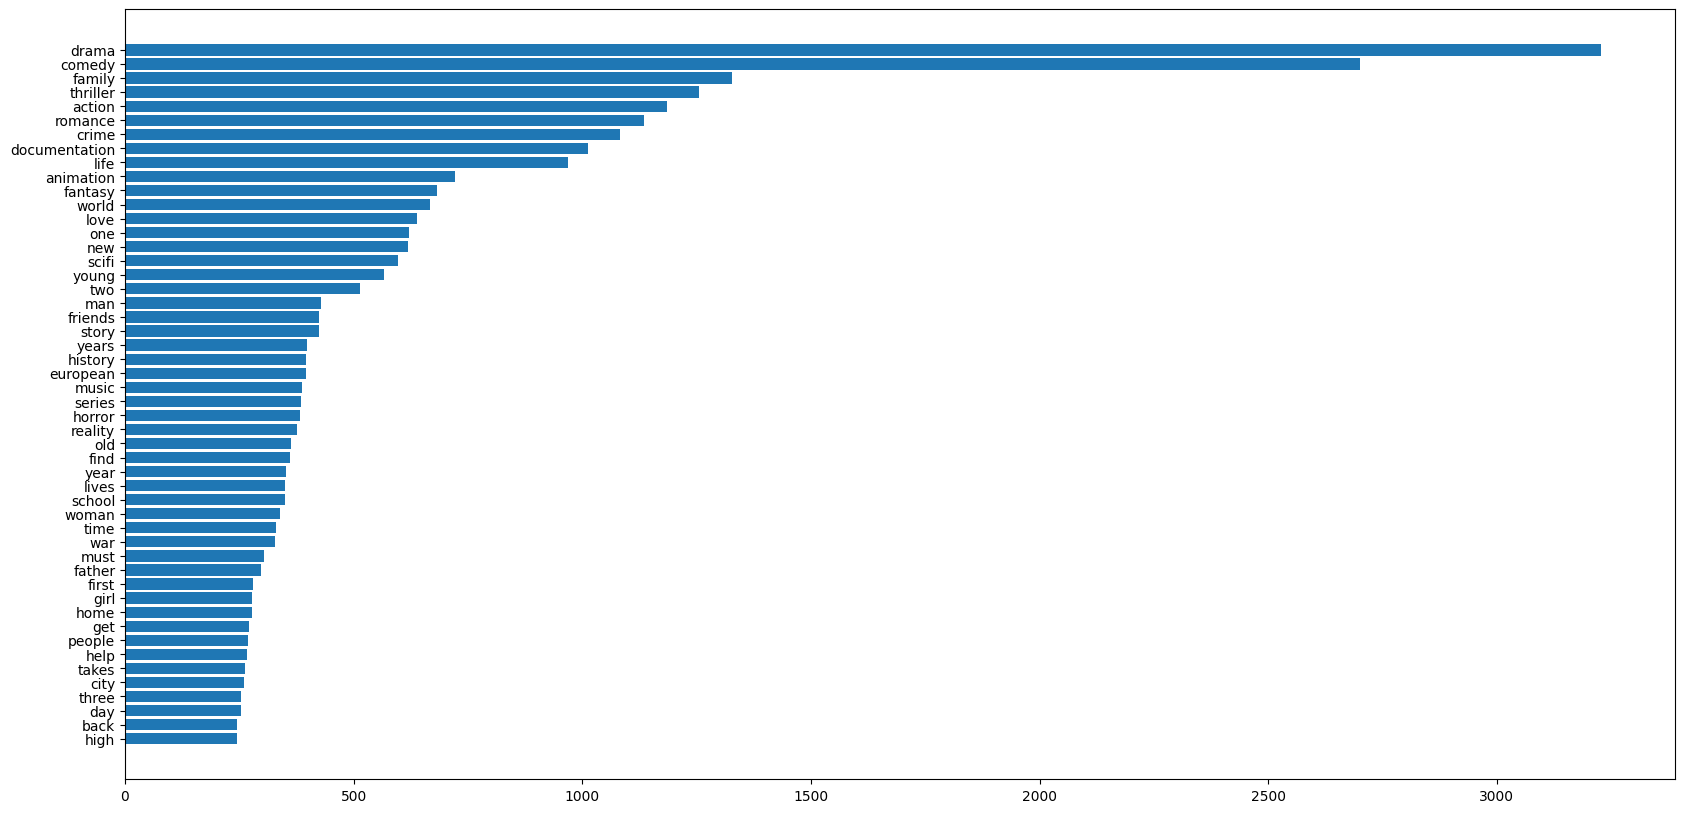

In [69]:
from nltk import FreqDist # Function to find the frequent words in the data

# Extract words into list and count frequency
all_words=' '.join([text for text in data['description_n_genres']])
all_words = all_words.split()
words_data=FreqDist(all_words)

# Extrcting words and frequency from words_data object
words_data = pd.DataFrame({'word':list(words_data.keys()), 'count':list(words_data.values())})

# Subset top 30 words by frequency
words_data = words_data.nlargest(columns='count', n=50)

words_data.sort_values('count',inplace=True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
plt.barh(words_data['word'], width = words_data['count'])
plt.show()

In [70]:
words_data.sort_values('count',inplace=True,ascending=False,)
# words_data


In [71]:
# Making list of custom words to be removed
additional_words=['movie','film','one','make','even','see','movies','get','makes','making','time','watch','character','like','good','well',
                  'would','really','series','life','lives','world','new','two','three','year','years','must','take','takes']

# Adding to the lsit of words
stop_words.extend(additional_words)



In [72]:
data['description_n_genres']=data['description_n_genres'].apply(lambda row: remove_stopwords(row))


In [73]:
data['description_n_genres'][110]

'follow adventures sonic hedgehog sidekick tails attempt stop robotnik array robots taking planet mobius scifi action comedy western family animation fantasy'

#### Lemmatisation

In [74]:
nltk.download('wordnet') # corpus to extract the root word from words
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Method to convert nltk tag to wordnet tag
lemmatiser = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [75]:
# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

def lemmatise_sentence(sentence):
  # word tokenise -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatiser -> root word
    #tokenise the sentence and find the POS tag for each token
    # nltk.word_tokenize() is for word tokenising the senteces, means splits the sentence into words
    # nltk.pos_tag extracts detailed Parts of Speech of each word like verb, adverb, adject, first person singular etc...
    nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    # We don't need detailed POS of thw word, we need just POS of the word to lemmatise it
    # tuple of (token,wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])),nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatised_sentence = []

    for word,tag in wordnet_tagged:
      if tag is None:
        # if there is no avaialble tag. append the toke as is
        lemmatised_sentence.append(word)
      else:
        # else use the tag to lemmatise the token
        lemmatised_sentence.append(lemmatiser.lemmatize(word,tag))

    return " ".join(lemmatised_sentence)

In [76]:
data['description_n_genres']=data['description_n_genres'].apply(lambda row: lemmatise_sentence(row))

In [77]:
data['description_n_genres'][0]

'collection include war era propaganda film many graphic offensive discuss docuseries five come back documentation'

#### Word Cloud



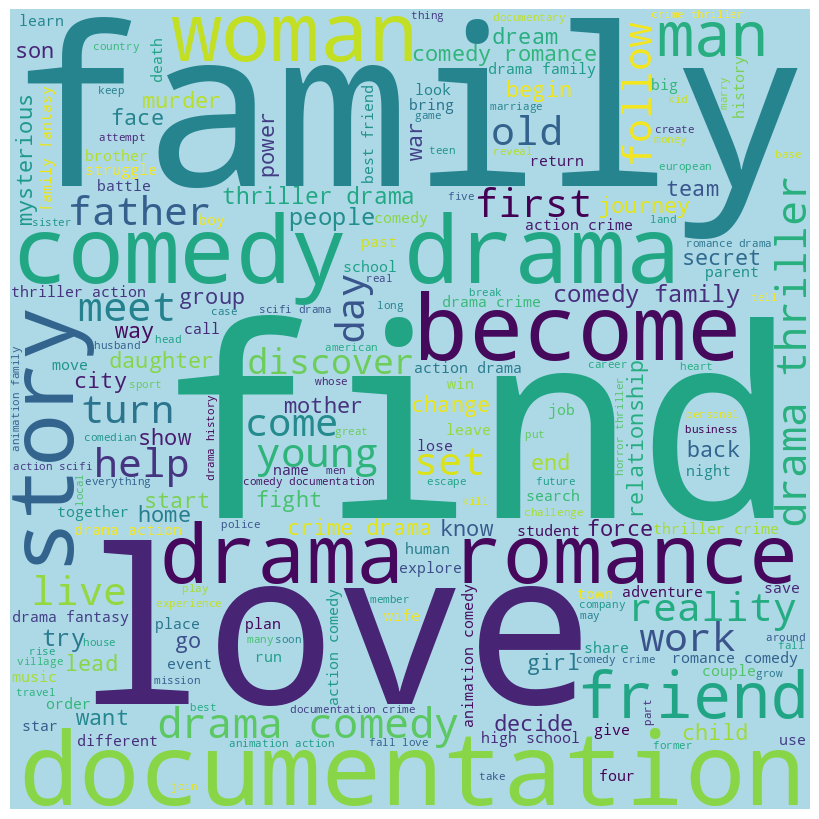

In [78]:
# bilding a word cloud

from wordcloud import WordCloud

word_cloud_data = data['description_n_genres']
all_words=' '.join([text for text in word_cloud_data])

wordCloud=WordCloud(width=800,height=800,background_color='#ADD8E6',min_font_size=10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8),facecolor=None)
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [79]:
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,description_processed,genres_processed,description_n_genres
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN,This collection includes 12 World War II-era p...,['documentation'],collection include war era propaganda film man...
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782,"When world heavyweight boxing champion, Apollo...","['drama', 'sport']",heavyweight box champion apollo creed want giv...
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406,Australian good girl Sandy and greaser Danny f...,"['romance', 'comedy']",australian girl sandy greaser danny fell love ...
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020,A novice con man teams up with an acknowledged...,"['crime', 'drama', 'comedy', 'music']",novice con man team acknowledge master avenge ...
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246,After Rocky goes the distance with champ Apoll...,"['drama', 'sport']",rocky go distance champ apollo creed try put f...


#### Embeddings Column
By combining title 'column' and 'description_n_genres' column, we will construct a new column 'embedding_text'.

In [80]:
data['embedding_text']=data['title']+data['description_n_genres']
data['embedding_text'][0]

'Five Came Back: The Reference Filmscollection include war era propaganda film many graphic offensive discuss docuseries five come back documentation'

In [81]:
embedding_text=' '.join([text for text in data['embedding_text']])
embedding_text

'Five Came Back: The Reference Filmscollection include war era propaganda film many graphic offensive discuss docuseries five come back documentation Rockyheavyweight box champion apollo creed want give unknown fighter shot title publicity stunt handler choose palooka rocky balboa uneducated collector philadelphia loan shark rocky team trainer mickey goldmill lifetime break drama sport Greaseaustralian girl sandy greaser danny fell love summer unexpectedly discover high school able rekindle romance despite eccentric friend romance comedy The Stingnovice con man team acknowledge master avenge murder mutual friend pull ultimate big con swindle fortune big mobster crime drama comedy music Rocky IIrocky go distance champ apollo creed try put fight behind move rocky settle adrian put together outside ring creed seek rematch restore reputation soon enough master disaster italian stallion set collision course climactic battle brutal unforgettable drama sport Monty Python and the Holy Grailkin

Loading the model

In [82]:
pip install sentence-transformers

In [83]:
!pip install faiss-cpu -q
!pip install langchain -q


In [84]:
!pip install -U langchain-community -q


In [ ]:
from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings

embeddings = HuggingFaceInferenceAPIEmbeddings(
    api_key=inference_api_key, model_name="sentence-transformers/BAAI/bge-large-en-v1.5"
)


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('BAAI/bge-large-en-v1.5')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
from sentence_transformers import SentenceTransformer
import faiss

# Load the BAAI model
model = SentenceTransformer('BAAI/bge-large-en-v1.5')

def custom_embedder(texts):
    return model.encode(texts)

# Sample movie data (replace with your actual data)
movie_texts = embedding_text

# Generate embeddings for movie data
movie_embeddings = custom_embedder(movie_texts)
movie_embeddings = np.reshape(movie_embeddings, (len(movie_embeddings), -1))
# movie_embeddings = np.reshape(embeddings, (len(embeddings)))


# Create a FAISS index
dimension = movie_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(movie_embeddings)

# Function to search for similar movies
def search_movies(query):
    """
    Searches for movies similar to the given query using FAISS.

    Args:
        query: A string representing the user's search query.

    Returns:
        A list of movie titles and their corresponding similarity scores.
    """

    query_embedding = model.encode([query])[0]

    # Print shapes for debugging
    print("query_embedding shape:", query_embedding.shape)
    print("movie_embeddings shape:", movie_embeddings.shape)

    # Reshape if necessary (check dimensions beforehand)
    if len(query_embedding.shape) == 1:
        query_embedding = query_embedding.reshape(1, -1)
    elif query_embedding.shape[0] != movie_embeddings.shape[1]:
        query_embedding = query_embedding.reshape(1, -1)

    distances, indices = index.search(query_embedding.reshape(1,-1), k=5)

    similar_movies = []
    for i, distance in zip(indices.squeeze(), distances.squeeze()):
        similar_movies.append({"title": movie_texts[i], "score": 1 - distance})  # Adjust scoring based on distance

    return similar_movies

# User interaction (replace with Streamlit UI if desired)
while True:
  query = input("Enter your movie search (e.g., heartfelt romantic comedy): ")
  if query.lower() == "exit":
    break

  # Search for similar movies
  results = search_movies(query)

  # Display results
  print("Recommended Movies:")
  for movie in results:
    print(f"- {movie['title']} (Similarity Score: {movie['score']:.2f})")

print("Exiting...")